# Name: Abhishek Karmakar
# Task 3 - Exploratory Data Analysis on SuperStore dataset

**As a bussines manager, try to find out the weak areas where you can work to make more profit**

**What all business problems you can derive by exploring the data?**


In [3]:
#import libraries
import numpy as np                                                      
import pandas as pd                                                     
import matplotlib.pyplot as plt                                         
import seaborn as sns                                                   
%matplotlib inline

In [7]:
#load dataset
df = pd.read_csv('SampleSuperstore.csv')
dataset = df.copy()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
print("Nimber of rows : {}".format(dataset.shape[0]))

Nimber of rows : 9994


In [11]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head()

check_missing(dataset)

,Total,Percent
Ship Mode,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0


In [15]:
duplicate = dataset.duplicated()
duplicate.value_counts()

False    9977
True       17
dtype: int64

In [16]:
#check duplicate rows
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(dataset)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,9976,17,99.829881,0.170119


In [17]:
#Drop duplicates
dataset.drop_duplicates(inplace=True)

<AxesSubplot:ylabel='Ship Mode'>

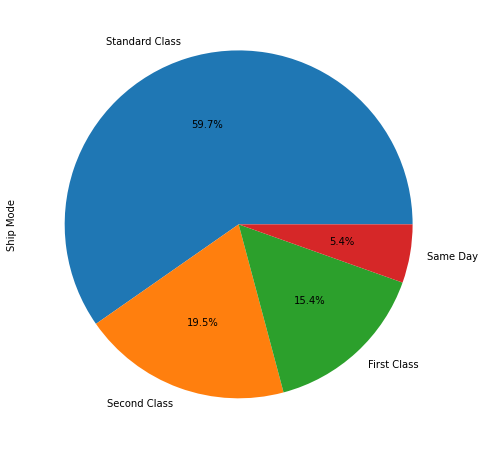

In [18]:
dataset['Ship Mode'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')

<AxesSubplot:ylabel='Region'>

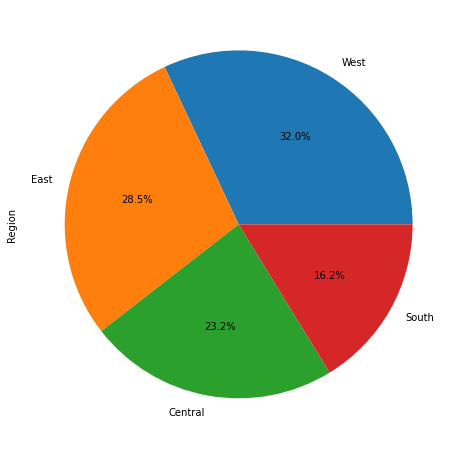

In [19]:
dataset['Region'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')

<AxesSubplot:ylabel='Category'>

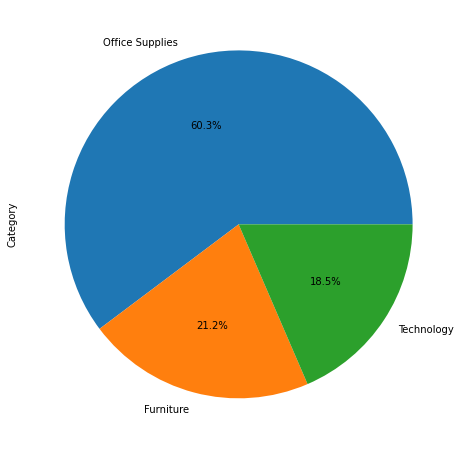

In [20]:
dataset['Category'].value_counts().plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')

<AxesSubplot:>

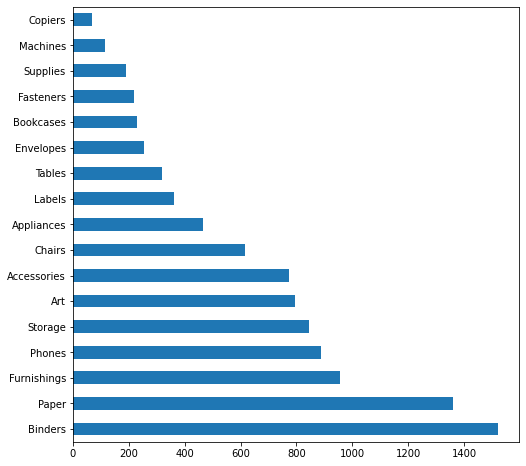

In [21]:
dataset['Sub-Category'].value_counts().plot(kind='barh',figsize=[8,8])

array([<AxesSubplot:ylabel='Sales'>], dtype=object)

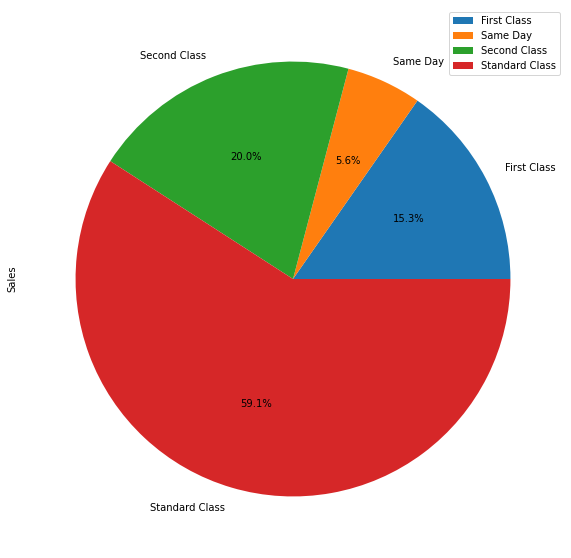

In [22]:
dataset[['Ship Mode','Sales']].groupby(['Ship Mode']).sum().plot(kind='pie',subplots=True,figsize=[10,10],autopct='%1.1f%%')

<AxesSubplot:ylabel='Ship Mode'>

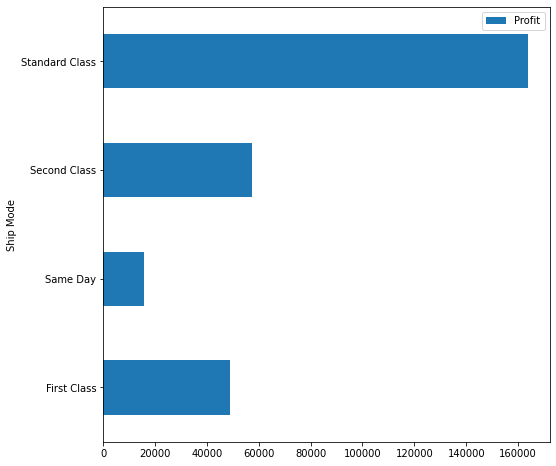

In [23]:
dataset[['Ship Mode','Profit']].groupby(['Ship Mode']).sum().plot(kind='barh',figsize=[8,8])

array([<AxesSubplot:ylabel='Sales'>], dtype=object)

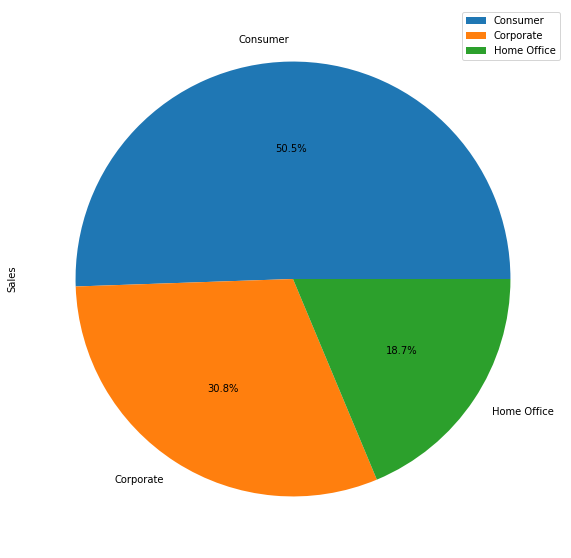

In [24]:
dataset[['Segment','Sales']].groupby(['Segment']).sum().plot(kind='pie',subplots=True,figsize=[10,10],autopct='%1.1f%%')

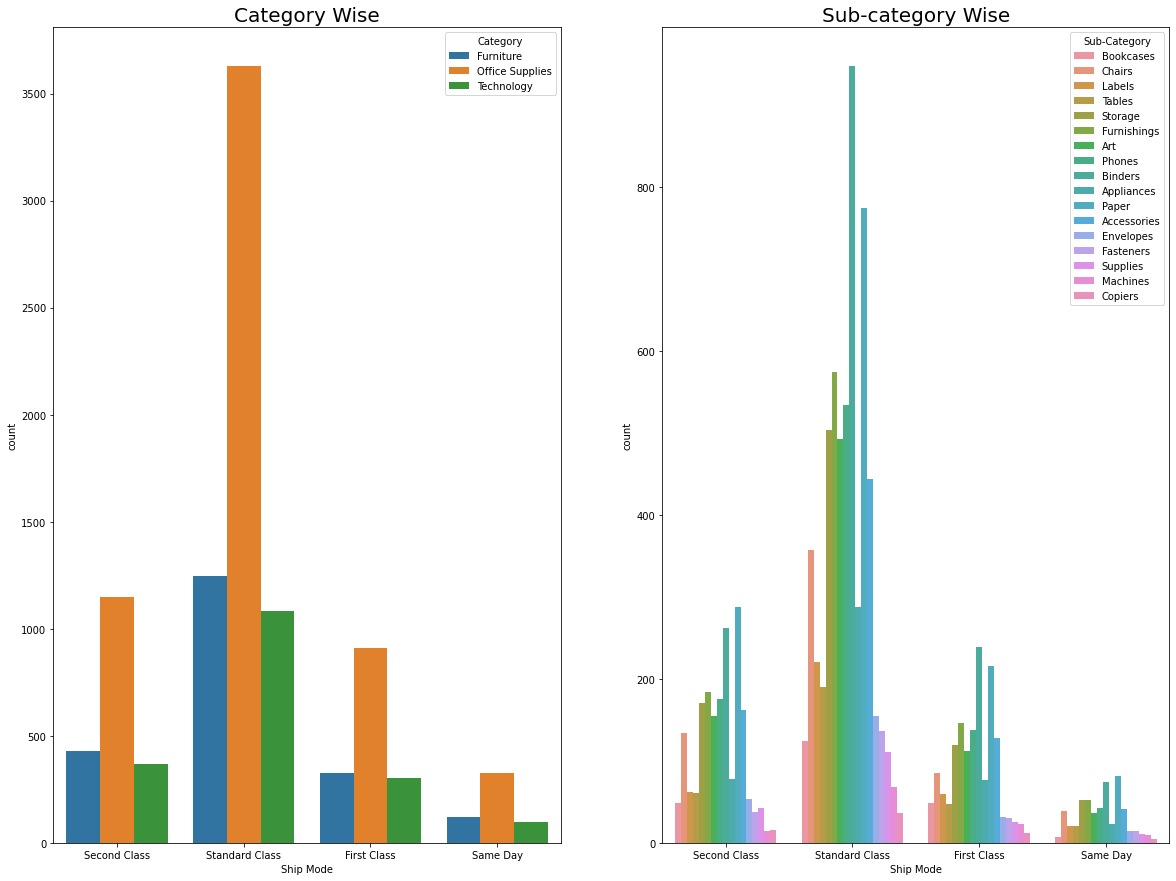

In [25]:
fig, axs = plt.subplots(ncols=2,  figsize = (20,15))
sns.countplot(x="Ship Mode", hue ='Category', data = dataset,  ax = axs[0])
sns.countplot(x="Ship Mode", hue ='Sub-Category', data = dataset,  ax = axs[1])
axs[0].set_title('Category Wise', fontsize = 20)
axs[1].set_title('Sub-category Wise', fontsize = 20)
plt.show()

**Ship Mode**: Maximum Dealings:- Category **(Office Supplies)** and Sub-Category **(Binders)** on Standard Class Mode

**Ship Mode**: Minimum Dealings:- Category **(Technology)** and Sub-Category **(Copiers)** on Same Day Mode

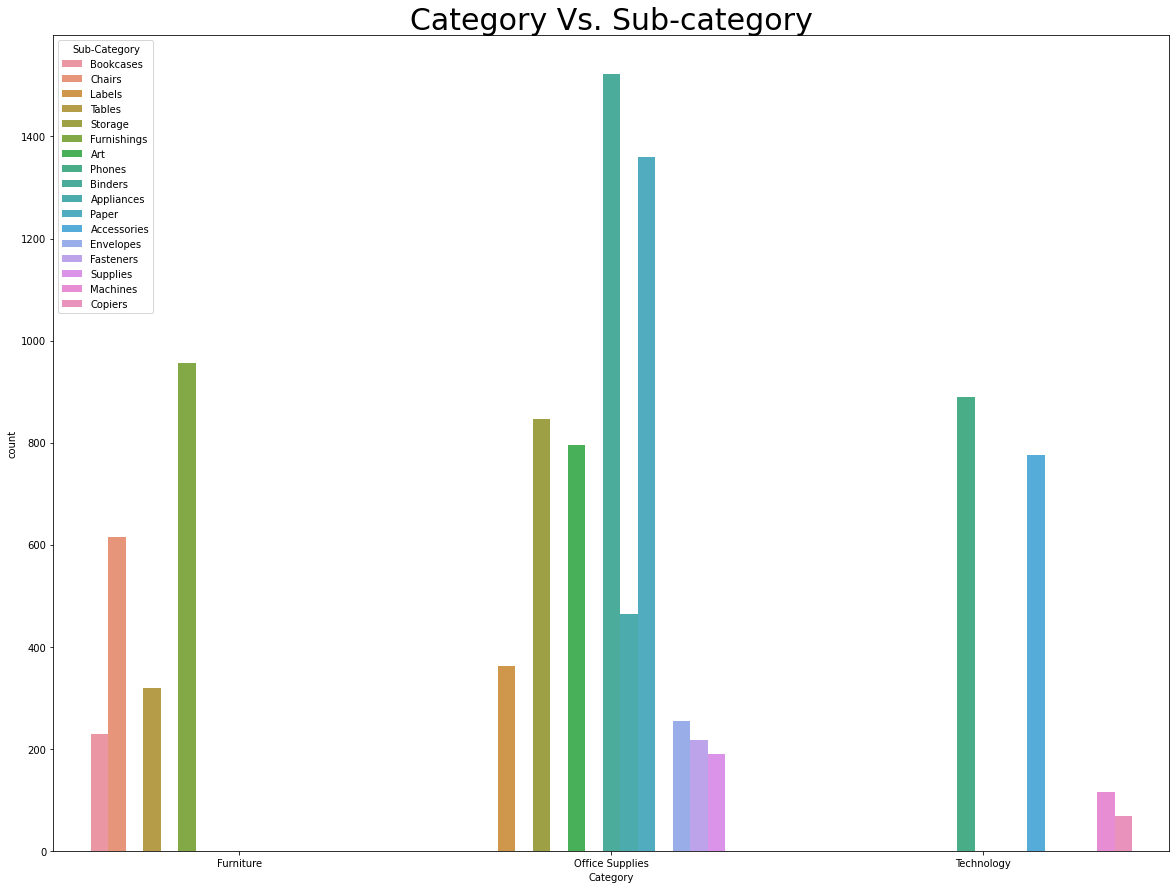

In [26]:
plt.subplots(figsize = (20,15))
sns.countplot(x="Category", hue ='Sub-Category', data = dataset)
plt.title('Category Vs. Sub-category', fontsize = 30)
plt.show()

### High Demand Products in Different Categories
**Funiture: Furnishings and Chairs**

**Office Supplies: Binders and Papers**

**Technology: Phones and Accessories**

### Low Demand Products in Different Categories
**Furniture: Bookcases and Tables**

**Office Supplies: Fasteners and Supplies**

**Technology: Machines and Copiers**

<AxesSubplot:>

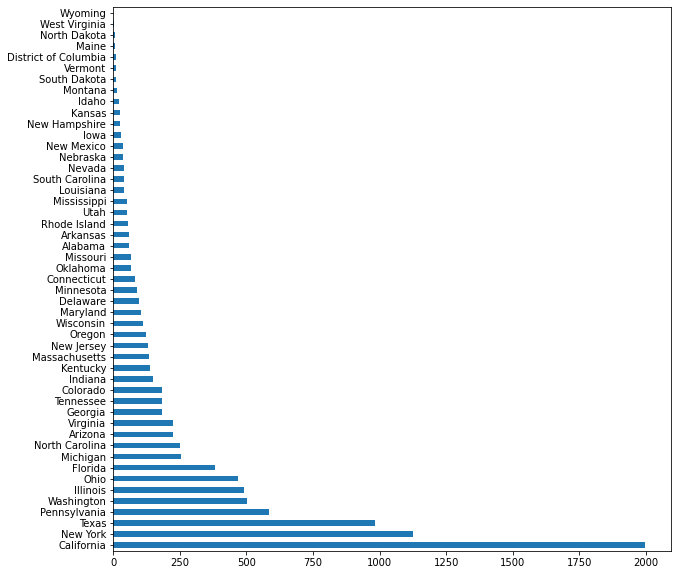

In [27]:
dataset['State'].value_counts().plot(kind='barh',figsize=[10,10])

**the most sales is come from California state**

**the lowest sales is come from wyoming**

<AxesSubplot:ylabel='Segment'>

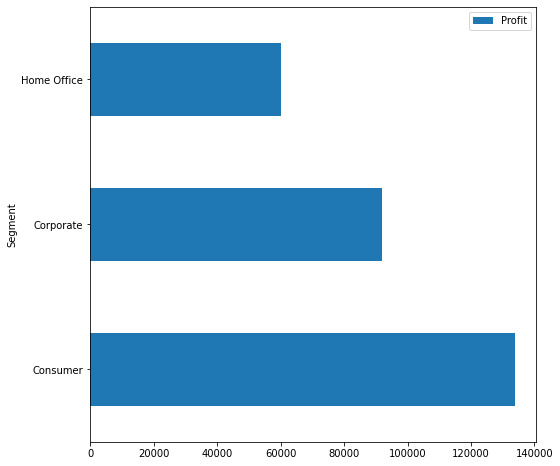

In [28]:
dataset[['Segment','Profit']].groupby(['Segment']).sum().plot(kind='barh',figsize=[8,8])

**Consumer is the most profit segment**

<AxesSubplot:ylabel='State'>

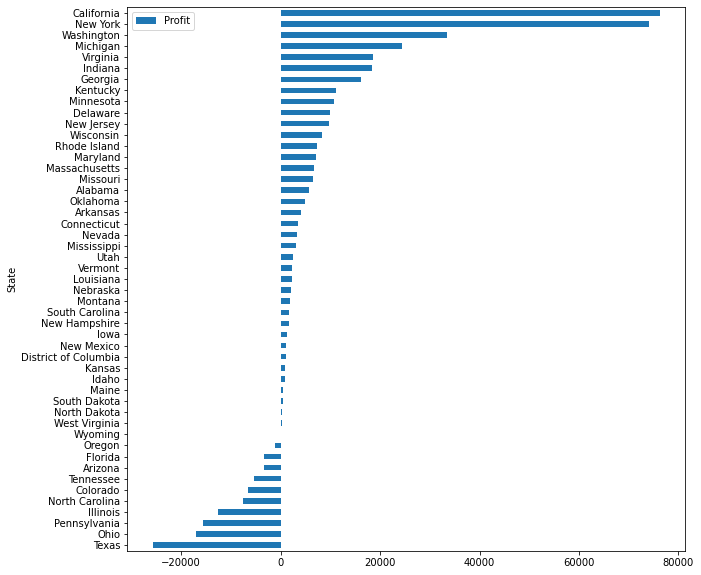

In [29]:
dataset[['State','Profit']].groupby(['State']).sum().sort_values(by = ['Profit']).plot(kind='barh',figsize=[10,10])

**the most profit come from New york, California States**

**but on the other side States such as Taxas, Colorado, ...... has negative earning**

array([<AxesSubplot:ylabel='Sales'>], dtype=object)

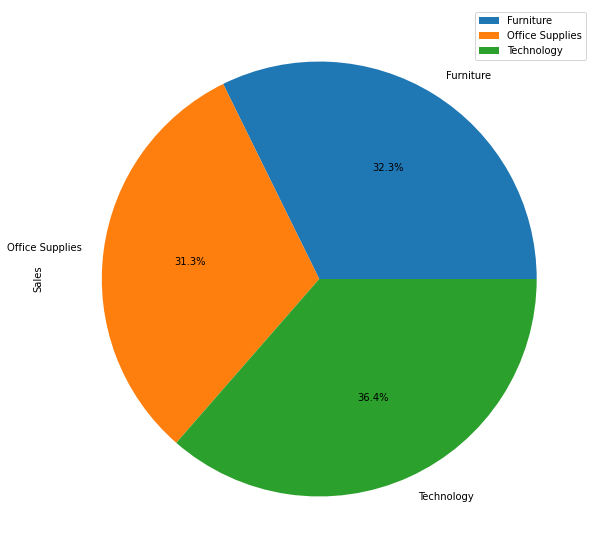

In [30]:
dataset[['Category','Sales']].groupby(['Category']).sum().plot(kind='pie',figsize=[10,10],subplots=True,autopct='%1.1f%%')

**We can say the sales of all categories is equal to each other**

<AxesSubplot:ylabel='Category'>

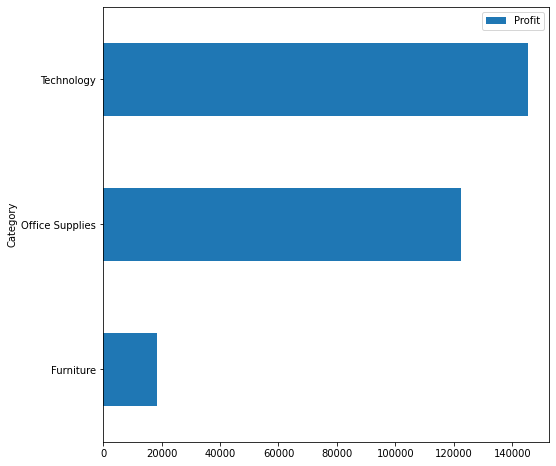

In [31]:
dataset[['Category','Profit']].groupby(['Category']).sum().plot(kind='barh',figsize=[8,8])

**although the sales of all categories is equal to each other the profit which come from furniture is very low**

<AxesSubplot:ylabel='Sub-Category'>

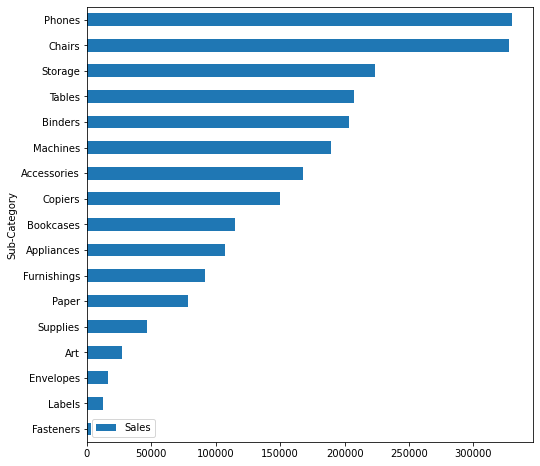

In [32]:
dataset[['Sub-Category','Sales']].groupby(['Sub-Category']).sum().sort_values(by = ['Sales']).plot(kind='barh',figsize=[8,8])

<AxesSubplot:ylabel='Sub-Category'>

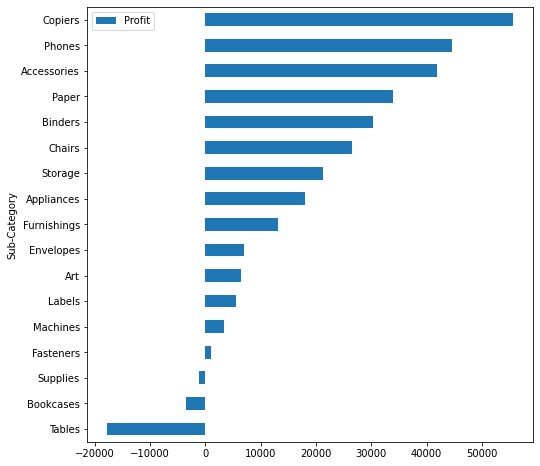

In [33]:
dataset[['Sub-Category','Profit']].groupby(['Sub-Category']).sum().sort_values(by = ['Profit']).plot(kind='barh',figsize=[8,8])

**the profit from Tables, Bookcases is negative earning which make furniture has low profit**